In [5]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.zip to Dataset.zip


In [8]:
import zipfile
import os

zip_path = "/content/Dataset.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

print("Extraction done ✅")
print("Content of /content:", os.listdir("/content"))


Extraction done ✅
Content of /content: ['.config', 'Dataset', 'Dataset.zip', 'sample_data']


Total images loaded: 2000
Model Accuracy: 0.6125
Actual: Dogs images
Predicted: Dogs images


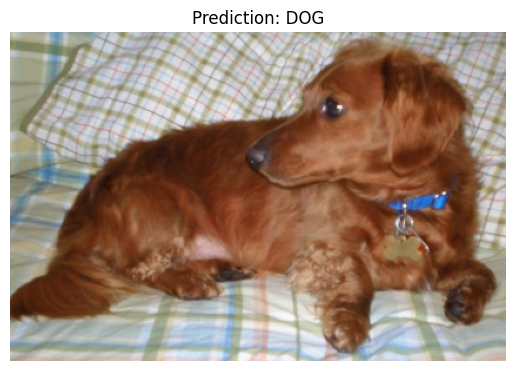

Model saved successfully ✅


In [10]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


DATASET_PATH = "/content/Dataset"

data = []
IMG_SIZE = 64
LIMIT = 1000

for category in categories:
    path = os.path.join(DATASET_PATH, category)
    label = categories.index(category)

    count = 0
    for img in os.listdir(path):
        if count >= LIMIT:
            break
        try:
            img_path = os.path.join(path, img)

            gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            gray = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
            gray = gray.flatten()

            data.append([gray, label, img_path])
            count += 1
        except:
            pass

print("Total images loaded:", len(data))

random.shuffle(data)

X, y, paths = [], [], []
for f, l, p in data:
    X.append(f)
    y.append(l)
    paths.append(p)

X = np.array(X) / 255.0
y = np.array(y)

X_train, X_test, y_train, y_test, path_train, path_test = train_test_split(
    X, y, paths, test_size=0.2, random_state=42
)


model = SVC(kernel="rbf", C=1, gamma="scale")
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)


dog_label = categories.index("Dogs images")

for i in range(len(predictions)):
    if predictions[i] == dog_label:
        print("Actual:", categories[y_test[i]])
        print("Predicted:", categories[predictions[i]])

        img = cv2.imread(path_test[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.title("Prediction: DOG")
        plt.axis("off")
        plt.show()
        break

with open("svm_dog_cat_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully ✅")
